In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
###: Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 3 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.843 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,1 day 3 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.843 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [11]:
###: Understanding Dataset with pylab library

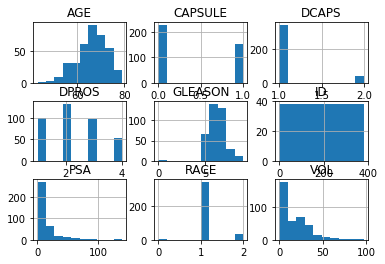

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'ID',
 u'CAPSULE',
 u'AGE',
 u'RACE',
 u'DPROS',
 u'DCAPS',
 u'PSA',
 u'VOL',
 u'GLEASON']

In [15]:
###: Setting Response column

In [16]:
response = "CAPSULE"

In [17]:
###: Setting Response column to factor so we can get unique values in it

In [18]:
df[response].asfactor().levels()

[['0', '1']]

In [19]:
###: Setting Response column to factor so we can build classification model

In [20]:
df[response] = df[response].asfactor()

In [21]:
###: Verifying Response column as factor 

In [22]:
df[response].describe()

Rows:380
Cols:1




,CAPSULE
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,0
1,0
2,0


In [23]:
###: spliting the dataset into train, test and validation  

In [24]:
train, valid, test = df.split_frame(ratios=[0.8,0.1])
print(train.shape)
print(valid.shape)
print(test.shape)

(304, 9)
(31, 9)
(45, 9)


In [25]:
###: Setting all columns/features into a local variable

In [26]:
features = df.col_names

In [27]:
###: Settings all features for model building

In [28]:
features.remove(response)
print(features)

[u'ID', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [29]:
###: Ignoring list of features which are not required for model building

In [30]:
ignore_list = ['ID']
for x in ignore_list:
    features.remove(x)
print(features)    

[u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [31]:
###: Importing H2O XGBoost Library

In [32]:
from h2o.estimators.xgboost import H2OXGBoostEstimator

In [33]:
###: Setting XGBooost Parameters

In [34]:
param = {
      "ntrees" : 200
    , "max_depth" : 10
    , "learn_rate" : 0.01
    , "sample_rate" : 0.9
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 10
}

In [35]:
###: Setting H2O XGBoost model configuration (default)

In [36]:
prostate_xgb = H2OXGBoostEstimator(**param)

In [37]:
###: Training H2O XGBoost model 

In [38]:
prostate_xgb.train(x = features, y = response, training_frame = train, validation_frame = valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [39]:
###: understanding the model metrics and various detials

In [40]:
prostate_xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1511234431789_17095


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.143038520285
RMSE: 0.378204336682
LogLoss: 0.457192434748
Mean Per-Class Error: 0.173651635721
AUC: 0.894186560566
Gini: 0.788373121132
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.425960719585: 


,0,1,Error,Rate
0,139.0,35.0,0.2011,(35.0/174.0)
1,19.0,111.0,0.1462,(19.0/130.0)
Total,158.0,146.0,0.1776,(54.0/304.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4259607,0.8043478,143.0
max f2,0.2769774,0.8741259,192.0
max f0point5,0.5015144,0.8095238,122.0
max accuracy,0.5015144,0.8322368,122.0
max precision,0.8430613,1.0,0.0
max recall,0.1747101,1.0,267.0
max specificity,0.8430613,1.0,0.0
max absolute_mcc,0.5015144,0.6559937,122.0
max min_per_class_accuracy,0.4584549,0.8218391,135.0
max mean_per_class_accuracy,0.4259607,0.8263484,143.0


Gains/Lift Table: Avg response rate: 42.76 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,0.8186577,2.3384615,2.3384615,1.0,1.0,0.0307692,0.0307692,133.8461538,133.8461538
,2,0.0230263,0.8142352,2.3384615,2.3384615,1.0,1.0,0.0230769,0.0538462,133.8461538,133.8461538
,3,0.0328947,0.8074847,2.3384615,2.3384615,1.0,1.0,0.0230769,0.0769231,133.8461538,133.8461538
,4,0.0427632,0.7960228,2.3384615,2.3384615,1.0,1.0,0.0230769,0.1,133.8461538,133.8461538
,5,0.0526316,0.7701518,2.3384615,2.3384615,1.0,1.0,0.0230769,0.1230769,133.8461538,133.8461538
,6,0.1019737,0.7461309,2.0266667,2.1875931,0.8666667,0.9354839,0.1,0.2230769,102.6666667,118.7593052
,7,0.1513158,0.7195308,1.8707692,2.0842809,0.8,0.8913043,0.0923077,0.3153846,87.0769231,108.4280936
,8,0.2006579,0.6913740,2.1825641,2.1084489,0.9333333,0.9016393,0.1076923,0.4230769,118.2564103,110.8448928
,9,0.2993421,0.6219141,1.6369231,1.9530008,0.7,0.8351648,0.1615385,0.5846154,63.6923077,95.3000845
,10,0.4013158,0.5115768,1.7349876,1.8976040,0.7419355,0.8114754,0.1769231,0.7615385,73.4987593,89.7604035




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.201518924577
RMSE: 0.448908592674
LogLoss: 0.587236574585
Mean Per-Class Error: 0.290404040404
AUC: 0.752525252525
Gini: 0.505050505051
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.650715053082: 


,0,1,Error,Rate
0,19.0,3.0,0.1364,(3.0/22.0)
1,4.0,5.0,0.4444,(4.0/9.0)
Total,23.0,8.0,0.2258,(7.0/31.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6507151,0.5882353,7.0
max f2,0.2519993,0.7377049,24.0
max f0point5,0.6507151,0.6097561,7.0
max accuracy,0.7726602,0.7741935,1.0
max precision,0.7931542,1.0,0.0
max recall,0.2519993,1.0,24.0
max specificity,0.7931542,1.0,0.0
max absolute_mcc,0.6507151,0.4348471,7.0
max min_per_class_accuracy,0.4686884,0.6666667,11.0
max mean_per_class_accuracy,0.6507151,0.7095960,7.0


Gains/Lift Table: Avg response rate: 29.03 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0322581,0.7870060,3.4444444,3.4444444,1.0,1.0,0.1111111,0.1111111,244.4444444,244.4444444
,2,0.0322581,0.7808578,0.0,3.4444444,0.0,1.0,0.0,0.1111111,-100.0,244.4444444
,3,0.0322581,0.7747096,0.0,3.4444444,0.0,1.0,0.0,0.1111111,-100.0,244.4444444
,4,0.0645161,0.7725460,3.4444444,3.4444444,1.0,1.0,0.1111111,0.2222222,244.4444444,244.4444444
,5,0.0645161,0.7723747,0.0,3.4444444,0.0,1.0,0.0,0.2222222,-100.0,244.4444444
,6,0.1290323,0.7526100,1.7222222,2.5833333,0.5,0.75,0.1111111,0.3333333,72.2222222,158.3333333
,7,0.1612903,0.7290545,0.0,2.0666667,0.0,0.6,0.0,0.3333333,-100.0,106.6666667
,8,0.2258065,0.6766967,1.7222222,1.9682540,0.5,0.5714286,0.1111111,0.4444444,72.2222222,96.8253968
,9,0.3225806,0.6107125,1.1481481,1.7222222,0.3333333,0.5,0.1111111,0.5555556,14.8148148,72.2222222
,10,0.4193548,0.4613148,1.1481481,1.5897436,0.3333333,0.4615385,0.1111111,0.6666667,14.8148148,58.9743590



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-11-21 22:39:38,0.001 sec,0.0,0.5,0.6931472,0.5,1.0,0.5723684,0.5,0.6931472,0.5,1.0,0.7096774
,2017-11-21 22:39:38,0.009 sec,10.0,0.4851005,0.6637536,0.8469496,2.3384615,0.2302632,0.4916691,0.6766008,0.6414141,3.4444444,0.2903226
,2017-11-21 22:39:38,0.014 sec,20.0,0.4718291,0.6381406,0.8579355,2.3384615,0.1973684,0.4841767,0.6618506,0.6616162,0.0,0.3225806
,2017-11-21 22:39:38,0.020 sec,30.0,0.4606048,0.6167885,0.8648099,2.3384615,0.2006579,0.4780667,0.6498563,0.6919192,0.0,0.4193548
,2017-11-21 22:39:38,0.026 sec,40.0,0.4505913,0.5978741,0.8681477,2.3384615,0.1907895,0.4737152,0.6412425,0.6994949,0.0,0.3225806
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-11-21 22:39:38,0.119 sec,160.0,0.3883211,0.4776820,0.8886605,2.3384615,0.1776316,0.4522312,0.5947059,0.7323232,3.4444444,0.3225806
,2017-11-21 22:39:38,0.129 sec,170.0,0.3856022,0.4722125,0.8906499,2.3384615,0.1842105,0.4515395,0.5931250,0.7323232,3.4444444,0.3225806
,2017-11-21 22:39:38,0.138 sec,180.0,0.3831266,0.4670772,0.8915340,2.3384615,0.1842105,0.4500336,0.5899593,0.7424242,3.4444444,0.2258065
,2017-11-21 22:39:38,0.148 sec,190.0,0.3806922,0.4621172,0.8928161,2.3384615,0.1776316,0.4491302,0.5878479,0.7474747,3.4444444,0.2258065



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
PSA,581.0,1.0,0.3647207
AGE,268.0,0.4612737,0.1682360
VOL,267.0,0.4595525,0.1676083
GLEASON,239.0,0.4113597,0.1500314
DPROS,207.0,0.3562823,0.1299435
DCAPS,26.0,0.0447504,0.0163214
RACE,5.0,0.0086059,0.0031387


In [41]:
prostate_xgb.model_performance(valid=True).auc()

0.7525252525252526

In [42]:
###: Plotting XGBoost  Model for its AUC metric 

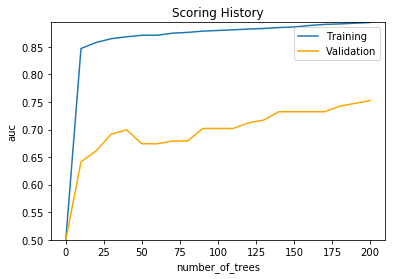

In [43]:
prostate_xgb.plot(metric='auc')

In [44]:
###: Generating Variable Importance Plot for the XGBoost Model

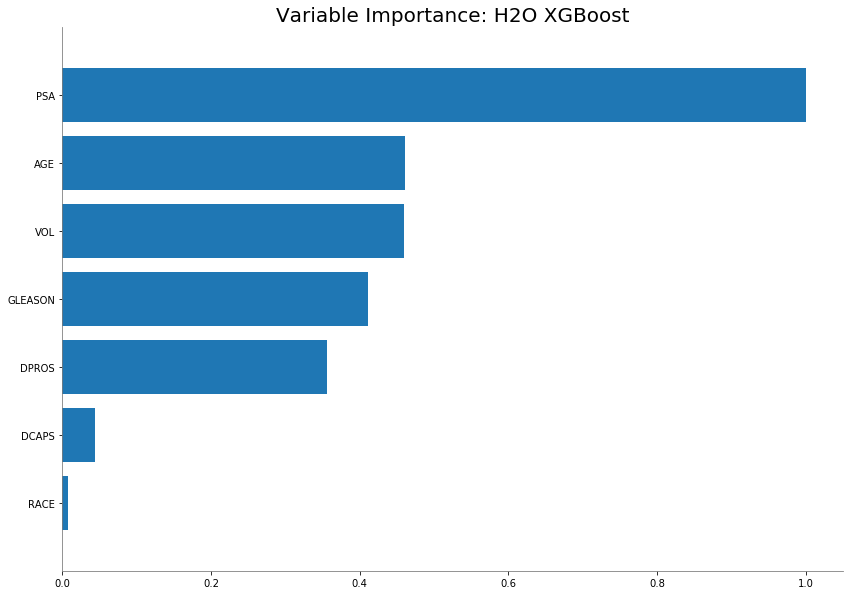

In [45]:
prostate_xgb.varimp_plot()

In [46]:
###:  H2O XGBoost Scoring History

In [47]:
prostate_xgb.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
0,,2017-11-21 22:39:38,0.001 sec,0.0,0.500000,0.693147,0.500000,1.000000,0.572368,0.500000,0.693147,0.500000,1.000000,0.709677
1,,2017-11-21 22:39:38,0.009 sec,10.0,0.485101,0.663754,0.846950,2.338462,0.230263,0.491669,0.676601,0.641414,3.444444,0.290323
2,,2017-11-21 22:39:38,0.014 sec,20.0,0.471829,0.638141,0.857935,2.338462,0.197368,0.484177,0.661851,0.661616,0.000000,0.322581
3,,2017-11-21 22:39:38,0.020 sec,30.0,0.460605,0.616788,0.864810,2.338462,0.200658,0.478067,0.649856,0.691919,0.000000,0.419355
4,,2017-11-21 22:39:38,0.026 sec,40.0,0.450591,0.597874,0.868148,2.338462,0.190789,0.473715,0.641243,0.699495,0.000000,0.322581
5,,2017-11-21 22:39:38,0.033 sec,50.0,0.441220,0.580250,0.871021,2.338462,0.174342,0.470031,0.633818,0.674242,0.000000,0.354839
6,,2017-11-21 22:39:38,0.040 sec,60.0,0.433821,0.566257,0.870933,2.338462,0.184211,0.466452,0.626582,0.674242,0.000000,0.354839
7,,2017-11-21 22:39:38,0.047 sec,70.0,0.426543,0.552565,0.874735,2.338462,0.180921,0.464110,0.621670,0.679293,0.000000,0.354839
8,,2017-11-21 22:39:38,0.054 sec,80.0,0.420158,0.540409,0.876127,2.338462,0.190789,0.462228,0.617579,0.679293,0.000000,0.354839
9,,2017-11-21 22:39:38,0.062 sec,90.0,0.414791,0.530121,0.878470,2.338462,0.180921,0.460419,0.613591,0.702020,3.444444,0.354839


In [48]:
### PERFORMING PREDICTIONS USING a TEST DATA SET with Auto ML Leader model

In [49]:
prostate_xgb.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


C1,C2,C3
Y,0.198792,0.801208
N,0.512819,0.487181
Y,0.251143,0.748857
N,0.774559,0.225441
N,0.844376,0.155624
Y,0.242776,0.757224
N,0.507461,0.492539
Y,0.282053,0.717947
Y,0.212303,0.787697
Y,0.201554,0.798446


In [50]:
###: Getting AUC metrics from the test data using XGBoost Leader Model

In [51]:
prostate_xgb.model_performance(test_data=test).auc()

0.9285714285714285

In [52]:
prostate_xgb.download_mojo("/Users/avkashchauhan/Downloads/prostate_xgb.zip", get_genmodel_jar=True)

'/Users/avkashchauhan/Downloads/prostate_xgb.zip/XGBoost_model_python_1511234431789_17095.zip'